In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d306989a3f38d34112a27a4ad7a1b2fc


In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | pasighat
Processing Record 3 of Set 1 | itaguai
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | grand-santi
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | capiibary
Processing Record 10 of Set 1 | san borja
Processing Record 11 of Set 1 | northam
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | biga
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 17 of Set 1 | kouango
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | igarka
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | henties bay
Processing Record 38 of Set 4 | zhezkazgan
Processing Record 39 of Set 4 | arman
Processing Record 40 of Set 4 | talavera
Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | taoudenni
Processing Record 43 of Set 4 | pecos
Processing Record 44 of Set 4 | pandamatenga
Processing Record 45 of Set 4 | darhan
Processing Record 46 of Set 4 | kindu
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | byron bay
Processing Record 49 of Set 4 | winnemucca
Processing Record 50 of Set 4 | monywa
Processing Record 1 of Set 5 | imbituba
Processing Record 2 of Set 5 | marystown
Processing Record 3 of Set 5 | nehe
Processing Record 4 of Set 5 | mrirt
City not found. Skipping...
Processing Record 5 of Set 5 | antsirabe
Processing Record 6 of Set 5 | norman wells
Processing Record 7 of Set 5 | marfino
Processing Record 8 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing R

Processing Record 29 of Set 8 | miri
Processing Record 30 of Set 8 | coruripe
Processing Record 31 of Set 8 | anuradhapura
Processing Record 32 of Set 8 | mayo
Processing Record 33 of Set 8 | blagodatnoye
Processing Record 34 of Set 8 | port-cartier
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | moratuwa
Processing Record 37 of Set 8 | lingao
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | makat
Processing Record 40 of Set 8 | cootamundra
Processing Record 41 of Set 8 | lavumisa
Processing Record 42 of Set 8 | santa marta
Processing Record 43 of Set 8 | hervey bay
Processing Record 44 of Set 8 | orlik
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | pronsk
Processing Record 47 of Set 8 | chengalpattu
Processing Record 48 of Set 8 | fukue
Processing Record 49 of Set 8 | geraldton
Processing Record 50 of Set 8 | juneau
Processing Record 1 of Set 9 | broken hill
Processing Record 2 of Set 9 | narasannapeta

Processing Record 22 of Set 12 | yinchuan
Processing Record 23 of Set 12 | ballina
Processing Record 24 of Set 12 | tromso
Processing Record 25 of Set 12 | sosnovo
Processing Record 26 of Set 12 | viedma
Processing Record 27 of Set 12 | atambua
Processing Record 28 of Set 12 | skjaerhollen
City not found. Skipping...
Processing Record 29 of Set 12 | xunchang
Processing Record 30 of Set 12 | lityn
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | micheweni
Processing Record 33 of Set 12 | marcona
City not found. Skipping...
Processing Record 34 of Set 12 | ventspils
Processing Record 35 of Set 12 | xinzhou
Processing Record 36 of Set 12 | harper
Processing Record 37 of Set 12 | stornoway
Processing Record 38 of Set 12 | lensk
Processing Record 39 of Set 12 | labutta
City not found. Skipping...
Processing Record 40 of Set 12 | salinas
Processing Record 41 of Set 12 | olinda
Processing Record 42 of Set 12 | iskateley
Processing Record 43 of Set 12 | abadan
Pr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,51.01,75,0,3.36,ZA,2020-06-18 03:20:04
1,Pasighat,28.07,95.33,78.19,86,100,0.87,IN,2020-06-18 03:20:04
2,Itaguai,-22.85,-43.78,64.40,88,0,5.82,BR,2020-06-18 03:20:04
3,Punta Arenas,-53.15,-70.92,33.80,86,0,6.93,CL,2020-06-18 03:19:12
4,Ushuaia,-54.80,-68.30,33.80,86,20,4.70,AR,2020-06-18 03:19:22
5,Grand-Santi,4.25,-54.38,74.10,95,100,1.45,GF,2020-06-18 03:20:05
6,Pacific Grove,36.62,-121.92,73.40,28,1,4.70,US,2020-06-18 03:20:05
7,Capiibary,-24.80,-56.03,70.32,68,100,10.27,PY,2020-06-18 03:20:06
8,San Borja,-14.82,-66.85,71.26,80,3,2.21,BO,2020-06-18 03:20:06
9,Northam,51.03,-4.22,55.99,98,100,1.01,GB,2020-06-18 03:20:06


In [11]:
# Reorder the columns.
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign the new column orders to the dataframe.
city_data_df=city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-06-18 03:20:04,-33.93,18.42,51.01,75,0,3.36
1,Pasighat,IN,2020-06-18 03:20:04,28.07,95.33,78.19,86,100,0.87
2,Itaguai,BR,2020-06-18 03:20:04,-22.85,-43.78,64.40,88,0,5.82
3,Punta Arenas,CL,2020-06-18 03:19:12,-53.15,-70.92,33.80,86,0,6.93
4,Ushuaia,AR,2020-06-18 03:19:22,-54.80,-68.30,33.80,86,20,4.70
...,...,...,...,...,...,...,...,...,...
562,Sur,OM,2020-06-18 03:21:52,22.57,59.53,88.52,58,64,14.79
563,Ahar,IR,2020-06-18 03:21:52,38.48,47.07,63.01,61,0,2.82
564,Sakakah,SA,2020-06-18 03:21:52,29.97,40.21,75.20,27,0,9.17
565,Baruun-Urt,MN,2020-06-18 03:19:26,46.68,113.28,74.03,37,1,11.34


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
import time

In [18]:
today=time.time()
today=time.strftime("%x")
today

'06/17/20'

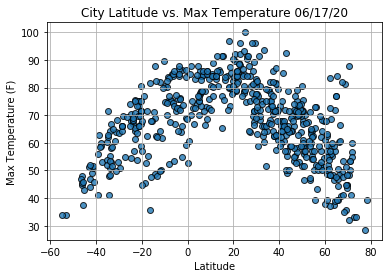

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

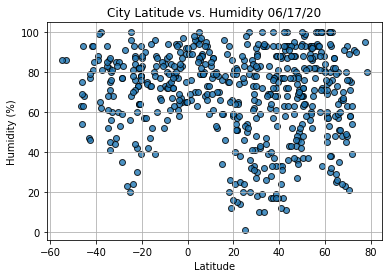

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

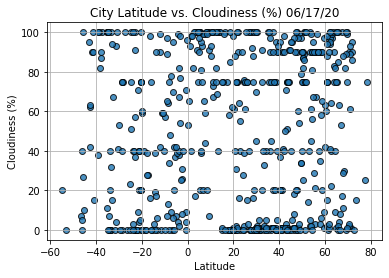

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

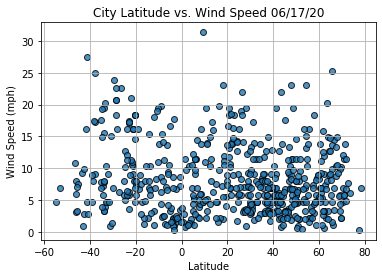

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
from scipy.stats import linregress

In [40]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

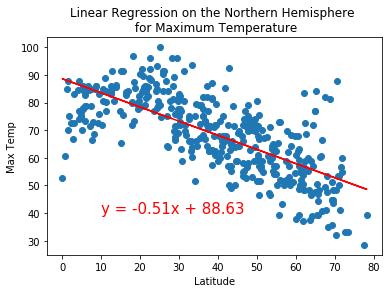

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

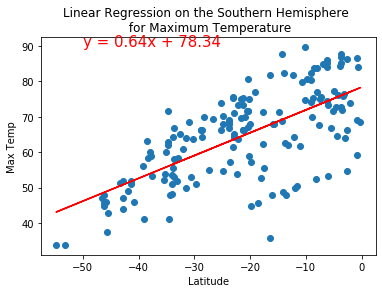

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

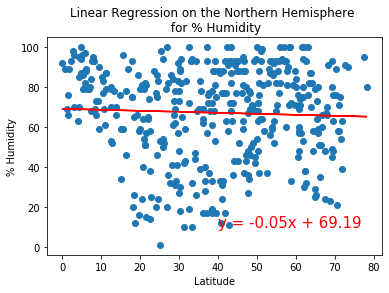

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

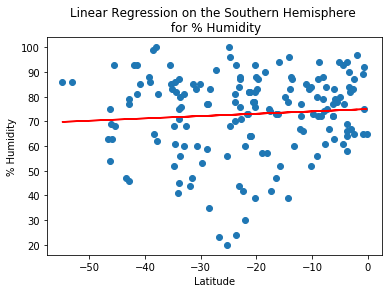

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

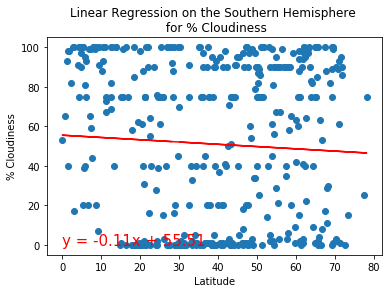

In [48]:
# Linear regression on the Northern Hemisphere for % of Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,0))

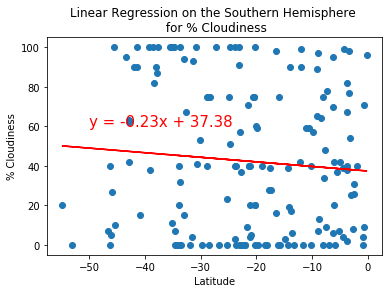

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

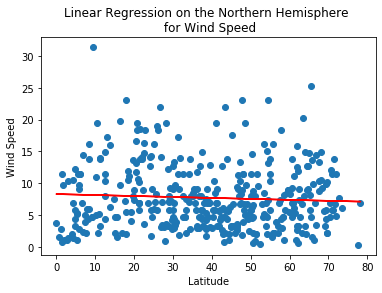

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

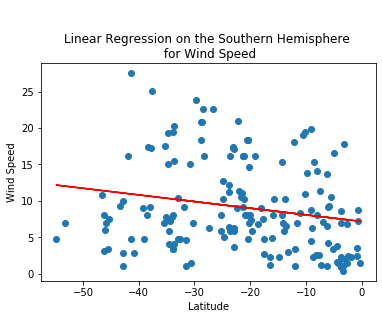

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))